In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import pandas as pd
import numpy as np
read_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/TimeSeries/data/time_series-3000.csv')

In [0]:
x = read_data.loc[:449, :]
y = read_data.loc[460, :]

In [75]:
np_x_list = x.to_numpy()
print(np_x_list.shape)
np_y = y.to_numpy()
print(np_y.shape)

(450, 61)
(61,)


In [76]:
b = np.arange(9, 0, -1).reshape(3, 3)
print(b)
print(b-3)

[[9 8 7]
 [6 5 4]
 [3 2 1]]
[[ 6  5  4]
 [ 3  2  1]
 [ 0 -1 -2]]


In [77]:
np_x = np_x_list[2,1:]
print(np_x)
print(np_x.size)

[34.83347075 25.56018488 26.22422165 27.85487064 27.81364058 26.57904339
 35.16683202 33.00381671 25.50192317 24.90608375 32.39123827 34.57162984
 31.19361694 27.49179683 29.95793228 35.27965696 25.87543321 30.05693501
 31.6503179  28.57762412 28.75041007 28.62136939 24.64279556 31.40306595
 32.43869002 35.06349022 28.08475154 33.20513882 25.49320501 27.77198088
 31.14056553 26.86319921 35.28557029 24.09423978 27.26754362 31.30673331
 30.90033195 28.10664815 34.99227573 25.60493403 26.99816814 32.33210506
 27.39645249 35.9459389  32.235205   28.61789549 33.50024868 32.39373565
 29.07206625 32.42739858 32.68430855 33.41768144 27.93283915 25.74654724
 33.82273163 27.96324904 26.0193642  25.34865125 32.17154625 27.20201453]
60


In [0]:
def make_W(x, y):
  W = []
  
  for i in range(np_x.size):
    temp = y - x[i]
    temp = temp * temp
    temp = np.sqrt(temp)
    W.append(temp)
  
  W = np.array(W)
  return W

In [79]:
print(np_x_list[2, 1:].shape)
print(np_y[1:].shape)
temp = make_W(np_x_list[2,1:], np_y[1:])
print(temp)
print(temp.shape)
print(temp.shape[1])

(60,)
(60,)
[[1.02145873e+01 1.14505009e+00 2.32184200e+00 ... 9.28102518e+00
  3.77926797e-01 9.74770470e+00]
 [9.41301424e-01 8.12823578e+00 6.95144387e+00 ... 7.73931522e-03
  9.65121267e+00 4.74418835e-01]
 [1.60533819e+00 7.46419901e+00 6.28740710e+00 ... 6.71776084e-01
  8.98717590e+00 1.13845560e+00]
 ...
 [7.29767795e-01 8.33976941e+00 7.16297750e+00 ... 2.03794314e-01
  9.86274629e+00 2.62885206e-01]
 [7.55266279e+00 1.51687441e+00 3.40082503e-01 ... 6.61910068e+00
  3.03985130e+00 7.08578020e+00]
 [2.58313108e+00 6.48640613e+00 5.30961421e+00 ... 1.64956897e+00
  8.00938301e+00 2.11624849e+00]]
(60, 60)
60


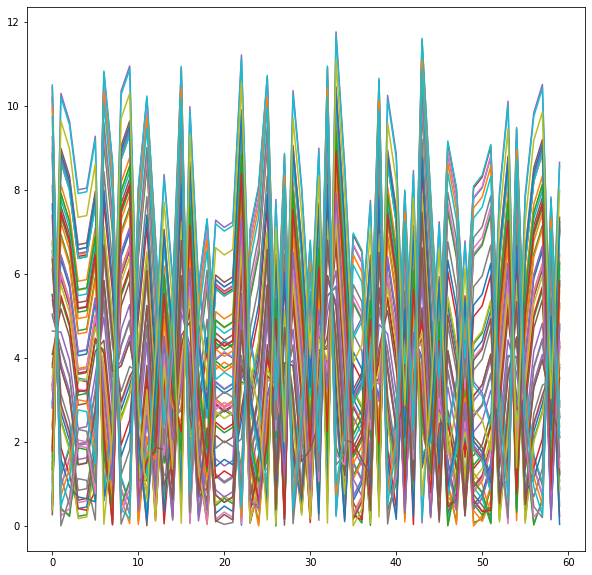

In [80]:
import matplotlib.pyplot as plt

plt.plot(temp)
plt.show()
## np_x_list[2, 1:]에 대한 W 행렬

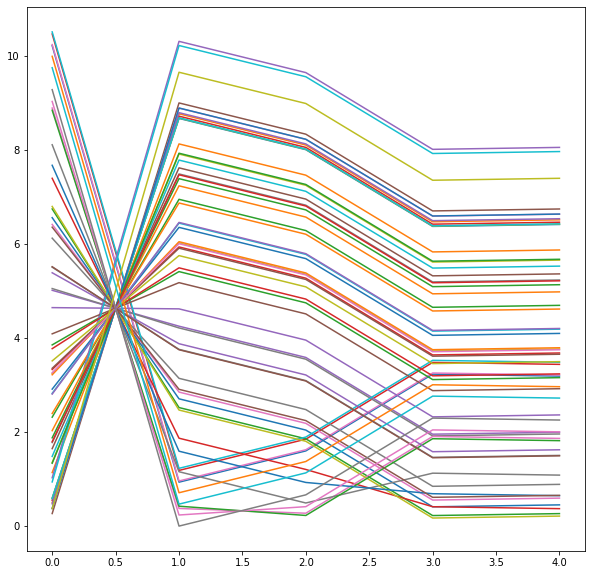

In [81]:
plt.plot(temp[:5, :])
plt.show()
## 

In [0]:
# D(i, j) = |xi - yi| + min{D(i-1, j), D(i-1, j-1), D(i, j-1)}
def DTW(x, y):
  D = np.full((x.size, y.size), np.inf, dtype=float) #(1743, 65)
  
  D[0, 0] = np.abs(x[0] - y[0])

  for c in range(1, x.shape[0]): #1, 1743
    D[0, c] = D[0, c-1] + np.abs(x[c] - y[0])
 
  for c in range(1, y.shape[0]):
    D[c, 0] = D[c-1, 0] + np.abs(x[0] - y[c])

  for i in range(1, D.shape[0]):
    for j in range(1, D.shape[1]):
      length = np.abs(x[i] - y[j])
      D[i,j] = length + min(D[i-1, j], D[i-1, j-1], D[i, j-1])

  return D


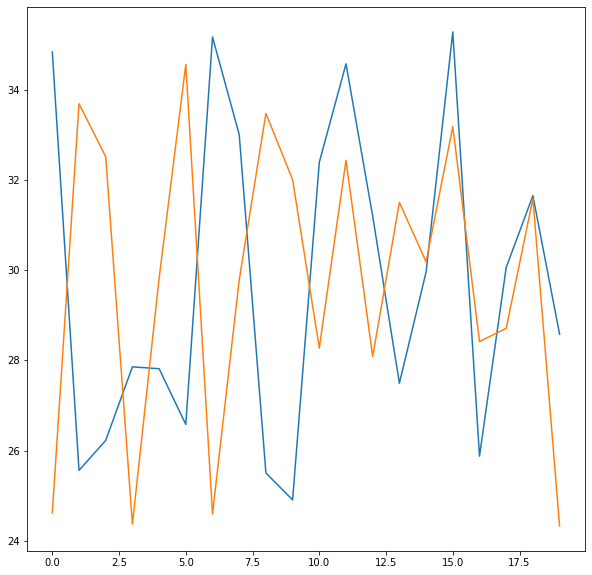

In [83]:
plt.plot(np_x_list[2,1:21])
plt.plot(np_y[1:21])
plt.show()

In [0]:
#np_x_list[2,1:].shape[0]
answer = DTW(np_x_list[2,1:21],np_y[1:21])

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 10]


In [86]:
df = pd.DataFrame(answer)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,10.214587,11.155889,12.761227,15.997214,19.191971,21.152131,31.700080,40.085013,40.968053,41.255253,49.027608,58.980354,65.555088,68.428001,73.767050,84.427823,85.684373,91.122425,98.153859,102.112600
1,11.359637,18.342823,18.107333,13.951958,18.207173,27.206390,22.118054,26.336241,34.249136,40.694369,43.406498,50.279684,52.806088,58.745431,63.368861,70.988723,73.843961,76.991663,83.015145,84.250189
2,13.681479,18.823836,24.394740,15.806726,17.543137,25.878316,23.748013,25.672205,32.921063,38.702258,40.750351,46.959500,48.821868,54.097173,58.056567,65.012392,67.203593,69.687259,75.046704,76.945784
3,24.145497,19.515029,23.480594,19.292143,17.767256,24.247667,27.008622,25.671515,31.289724,35.440271,35.857715,40.436215,40.667933,44.312590,46.641335,51.966510,52.527062,53.380079,57.108876,60.638605
4,29.163567,25.389809,24.213018,22.736330,19.769015,24.513016,27.467045,27.636247,31.330954,35.481501,35.898945,40.477445,40.709163,44.353820,46.682565,52.007740,52.568292,53.421309,57.150106,60.597374
5,29.437637,32.499187,30.145603,24.945920,23.005372,27.749373,26.497797,29.697126,34.530283,36.757328,37.174772,41.753272,41.984990,45.629647,47.958392,53.283568,53.844120,54.697137,58.425933,59.404007
6,39.676845,30.916048,32.800806,35.743299,28.356804,23.612803,34.185373,31.886257,31.390879,34.552294,41.446811,39.908233,46.988476,45.652295,50.612864,49.945178,56.696587,60.303064,58.280302,69.121992
7,44.731944,31.600652,31.408236,40.042599,31.545220,25.168387,32.022357,35.111701,31.860142,32.389278,37.120780,37.691226,42.608454,44.112743,46.932945,47.109174,51.697568,55.993497,57.413647,66.092322
8,46.092335,39.787150,38.417942,32.540706,35.858697,34.225865,26.076048,30.352498,38.323654,38.363636,35.159670,42.091117,40.275892,46.273496,48.794436,54.611068,50.022674,53.228638,59.310382,58.590429
9,48.920388,48.569487,46.023487,33.077336,37.450022,43.879182,26.387870,30.948337,38.919493,45.422988,38.525901,42.686957,43.456397,46.869336,51.551028,57.068398,53.532013,53.824478,59.906221,59.171371


Text(0.5, 1.0, 'Correlation Heatmap')

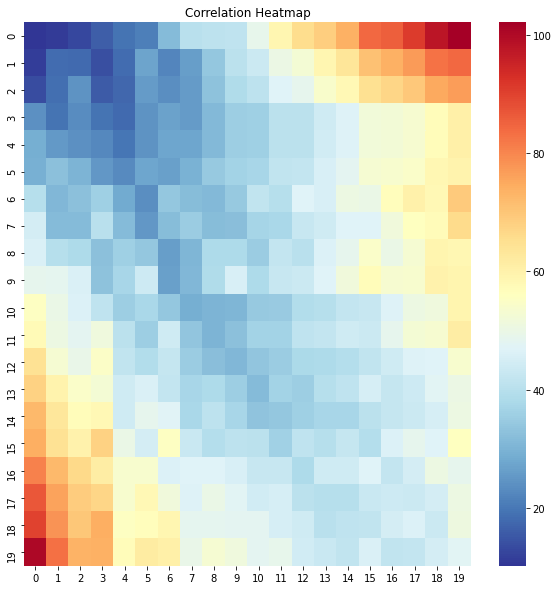

In [87]:

sns.heatmap(df, cmap = plt.cm.RdYlBu_r)
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'DTW Heatmap')

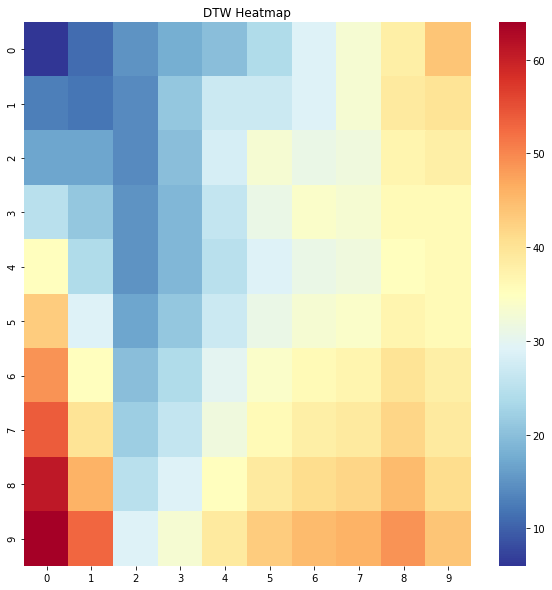

In [88]:
x = np.array([1,2,3,4,5,3,2,3,2,1])
y = np.array([7,8,5,9,11,9,7,6,8,4])

answer = DTW(x,y)

df = pd.DataFrame(answer)
df


sns.heatmap(df, cmap = plt.cm.RdYlBu_r)
plt.title('DTW Heatmap')

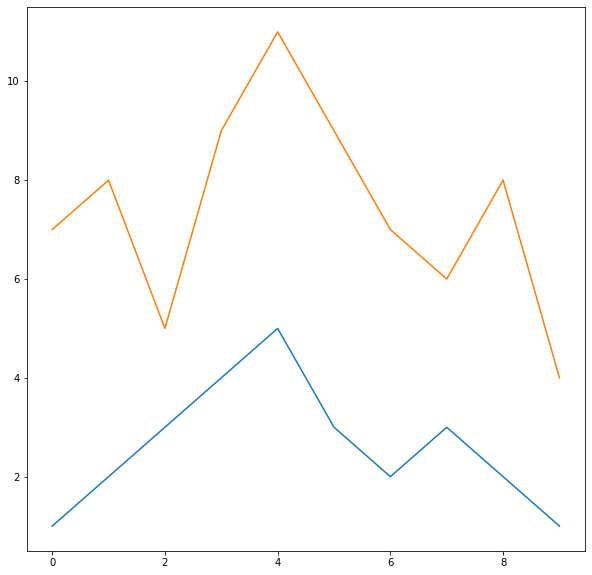

In [89]:
plt.plot(x)
plt.plot(y)
plt.show()

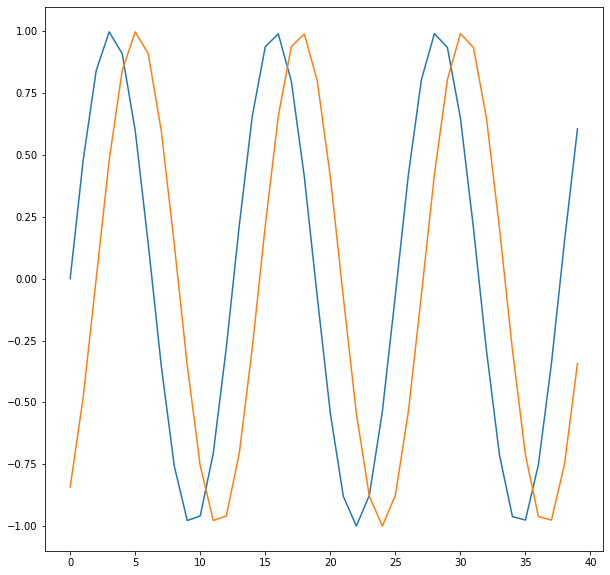

In [90]:
x = np.arange(0, 20, .5)
s1 = np.sin(x)
s2 = np.sin(x - 1)

plt.plot(s1)
plt.plot(s2)
plt.show()

Text(0.5, 1.0, 'DTW Heatmap')

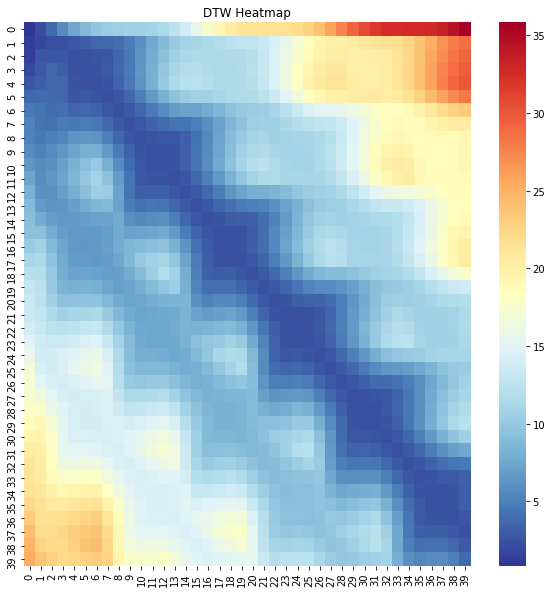

In [91]:
answer = DTW(s1, s2)

df = pd.DataFrame(answer)
df



sns.heatmap(df, cmap = plt.cm.RdYlBu_r)
plt.title('DTW Heatmap')

In [0]:
import pandas as pd
import numpy as np

bitcoin_data =pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/TimeSeries/bitcoin_DTW/dataset/bitcoin.csv')
HymanMinsky_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/TimeSeries/bitcoin_DTW/HymanMinsky.csv')